In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import time
from sklearn.metrics import accuracy_score
import sys

In [4]:
#source_folder = "//home//pc19d//Downloads//hw3//"
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw7"

In [5]:
os.listdir(os.path.join(source_folder,"Gisette"))

['Dataset.pdf',
 'GISETTE.htm',
 'gisette.param',
 'gisette_test.data',
 'gisette_train.data',
 'gisette_train.labels',
 'gisette_valid.data',
 'gisette_valid.labels']

### PreProcessing

In [85]:
def Preprocess(dataset,delimiter):

    Train_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.data"),delimiter =delimiter)
    Train_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.labels"))
    Test_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.data"),delimiter=delimiter)
    Test_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.labels"))
    scaler = preprocessing.StandardScaler().fit(Train_data)
    Train_data = scaler.transform(Train_data)
    Test_data  = scaler.transform(Test_data)
    #print(Train_data.mean(axis=0),Train_data.std(axis=0),Test_data.mean(axis=0),Test_data.std(axis=0))
    
    
    #Add a column of one
    #N_train,N_test              = Train_data.shape[0],Test_data.shape[0]
    #Train_data,Test_data        = np.hstack((np.ones((N_train,1)),Train_data)),np.hstack((np.ones((N_test,1)),Test_data))
    
    #Change label's from -1 to 0
    Train_label = np.where(Train_label==-1,0,Train_label)
    Test_label  = np.where(Test_label==-1,0,Test_label)
    Train_label,Test_label = Train_label.reshape(-1,1),Test_label.reshape(-1,1)
    
    return Train_data,Train_label,Test_data,Test_label

In [258]:
def predict(X,Y,beta_1,beta_0,name):
    res = X@beta_1 + beta_0.sum()
    res = np.sign(res)
    res = np.where(res==-1,0,res)
    print("%s Error is %f"%(name,1-accuracy_score(Y,res)))
    return 1-accuracy_score(Y,res)

In [269]:
def logitboost(X,Y,X_test,Y_test,name):
    K = np.array([10,30,100,300,500])
    N,p = X.shape
    Training_error = []
    Testing_error =  []
    
    
    for k in K:
        
        print("Running Routine for K =",k)
        loss_list = []
        h_x = np.zeros(shape=(N,1))
        p_x = np.zeros(shape=(N,1))
        beta_1 = np.zeros(shape=(p,1))
        beta_0 = np.zeros(shape=(p,1))
        beta_1_final = np.zeros(shape=(p,1))
        beta_0_final = np.zeros(shape=(p,1))
        
        for i in range(k):
            #logiboost step
            p_x = 1/(1+np.exp(-1*h_x))
            w   = p_x*(1-p_x)  
            z   = np.where(Y==1,1/p_x,-1/(1-p_x))


            #Find linear regressor param
            x_bar = np.sum(w*X,axis=0)/(np.sum(w,axis=None) + 1e-8)
            z_bar = np.sum(w*z,axis=None)/(np.sum(w,axis=None) + 1e-8)

            #print("2 ",x_bar.shape,z_bar)
            #print((X - x_bar).shape,(w*(z-z_bar)).shape)
            #print(np.sum(w*(z-z_bar)*(X - x_bar),axis=0).shape)
            #print(np.sum(w*np.square(X - x_bar),axis=0).shape)

            beta_1 = np.sum(w*(z-z_bar)*(X - x_bar),axis=0)/(np.sum(w*np.square(X - x_bar),axis=0) + 1e-8)
            beta_1 = beta_1.reshape(-1,1)
            beta_0 = z_bar - beta_1*(x_bar.reshape(-1,1))
            #print("3 ",p_x.shape,w.shape,z.shape,beta_1.shape,beta_0.shape)

            #
            #Feature selection
            temp = (X.T*beta_1 + beta_0).T
            temp2 = temp + h_x
            loss = np.sum(np.log(1+np.exp(-1*(2*Y-1)*temp2)),axis=0)
            selected_feature = np.argmin(loss)
            #print(selected_feature)

            #update
            #print("4 ",h_x.shape,temp[:,selected_feature].shape)
            h_x = h_x + temp[:,selected_feature].reshape(-1,1)
            beta_1_final[selected_feature],beta_0_final[selected_feature] = beta_1[selected_feature],beta_0[selected_feature]

            #loss at iteration i
            loss_list.append(loss[selected_feature])

        #predict
        Training_error.append(predict(X,Y,beta_1_final,beta_0_final,"Training"))
        Testing_error.append(predict(X_test,Y_test,beta_1_final,beta_0_final,"Test"))
        
        #plot loss 
        plt.plot(loss_list,label= "Log-Loss")
        plt.xlabel("Features")
        plt.ylabel("Log-Loss")
        plt.title("Error For %s Dataset for k = %d " %(name,k))
        plt.legend()
        plt.show()
    
    #plot error
    plt.xticks(np.linspace(0,len(K)-1,len(K)),K) 
    plt.plot(Training_error,label="Train Error")
    plt.plot(Testing_error,label="Test Error")
    plt.xlabel("K")
    plt.ylabel("Misclassification_error")
    plt.title("Error For %s Dataset as function of features" %name)
    plt.legend()
    plt.show()
    

    return Training_error,Testing_error
        



## Part 1

In [270]:
dataset  = str("Gisette")
Train_data_1,Train_label_1,Test_data_1,Test_label_1 = Preprocess(dataset,delimiter="")
Train_data_1.shape,Train_label_1.shape,Test_data_1.shape,Test_label_1.shape

((6000, 5000), (6000, 1), (1000, 5000), (1000, 1))

Running Routine for K = 10
Training Error is 0.074667
Test Error is 0.087000


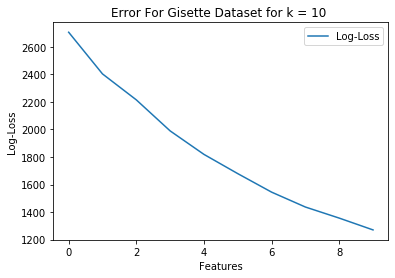

Running Routine for K = 30
Training Error is 0.035333
Test Error is 0.039000


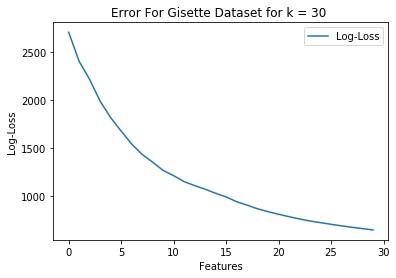

Running Routine for K = 100
Training Error is 0.012333
Test Error is 0.034000


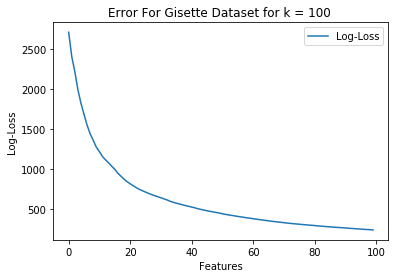

Running Routine for K = 300
Training Error is 0.006167
Test Error is 0.041000


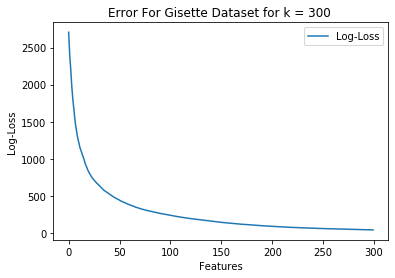

Running Routine for K = 500


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Training Error is 0.007500
Test Error is 0.031000


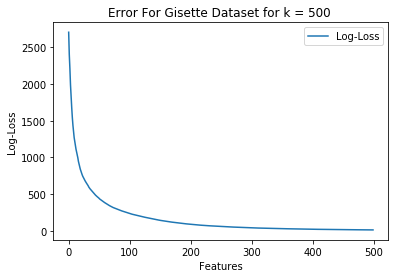

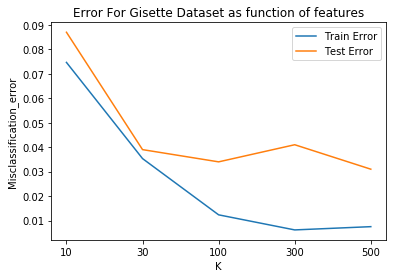

In [271]:
Training_error_1,Testing_error_1 = logitboost(Train_data_1,Train_label_1,Test_data_1,Test_label_1,"Gisette")

In [276]:
print(Training_error_1,Testing_error_1)

[0.07466666666666666, 0.03533333333333333, 0.012333333333333307, 0.006166666666666654, 0.007499999999999951] [0.08699999999999997, 0.039000000000000035, 0.03400000000000003, 0.041000000000000036, 0.031000000000000028]


# Part 2

In [272]:
dataset  = str("Dexter")
Train_data_2,Train_label_2,Test_data_2,Test_label_2 = Preprocess(dataset,delimiter=",")
Train_data_2.shape,Train_label_2.shape,Test_data_2.shape,Test_label_2.shape

((300, 20000), (300, 1), (300, 20000), (300, 1))

Running Routine for K = 10
Training Error is 0.106667
Test Error is 0.150000


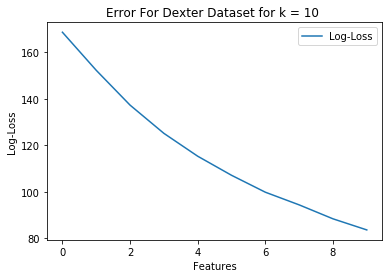

Running Routine for K = 30
Training Error is 0.020000
Test Error is 0.120000


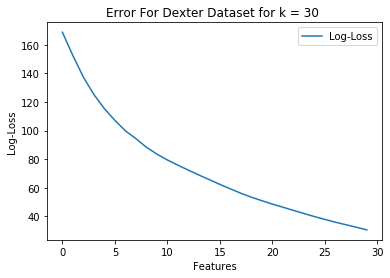

Running Routine for K = 100
Training Error is 0.003333
Test Error is 0.123333


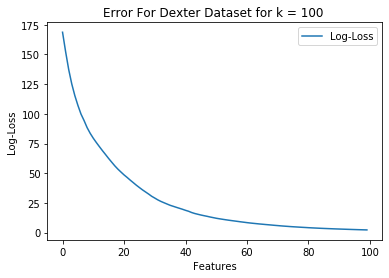

Running Routine for K = 300


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Training Error is 0.003333
Test Error is 0.100000


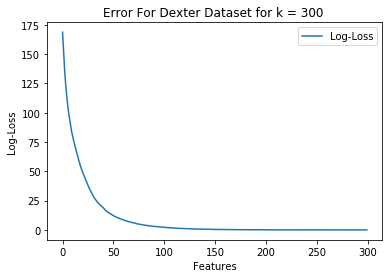

Running Routine for K = 500


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Training Error is 0.006667
Test Error is 0.133333


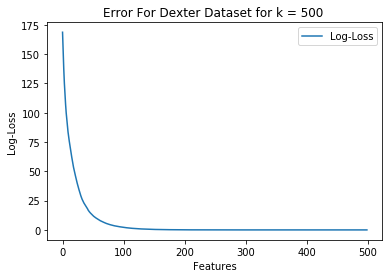

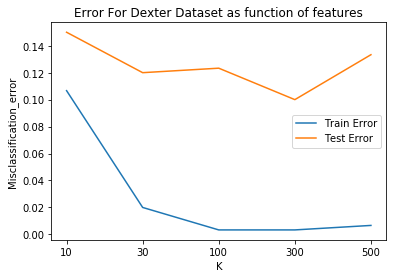

In [273]:
Training_error_2,Testing_error_2 = logitboost(Train_data_2,Train_label_2,Test_data_2,Test_label_2,"Dexter")

In [277]:
print(Training_error_2,Testing_error_2)

[0.10666666666666669, 0.020000000000000018, 0.0033333333333332993, 0.0033333333333332993, 0.00666666666666671] [0.15000000000000002, 0.12, 0.1233333333333333, 0.09999999999999998, 0.1333333333333333]


# Part 3

In [274]:
dataset  = str("MADELON")
Train_data_3,Train_label_3,Test_data_3,Test_label_3 = Preprocess(dataset,delimiter="")
Train_data_3.shape,Train_label_3.shape,Test_data_3.shape,Test_label_3.shape

((2000, 500), (2000, 1), (600, 500), (600, 1))

Running Routine for K = 10
Training Error is 0.377000
Test Error is 0.403333


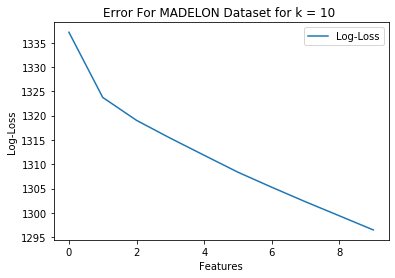

Running Routine for K = 30
Training Error is 0.345000
Test Error is 0.428333


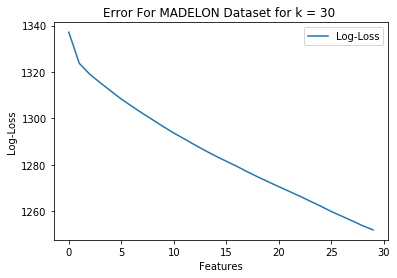

Running Routine for K = 100
Training Error is 0.309000
Test Error is 0.433333


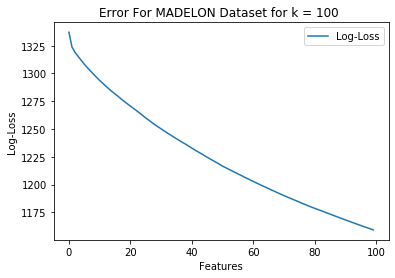

Running Routine for K = 300
Training Error is 0.312500
Test Error is 0.453333


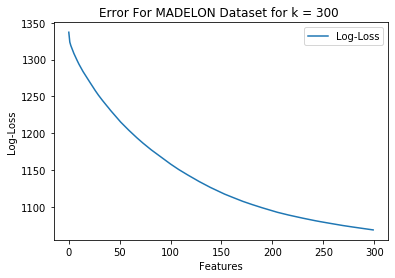

Running Routine for K = 500
Training Error is 0.332000
Test Error is 0.448333


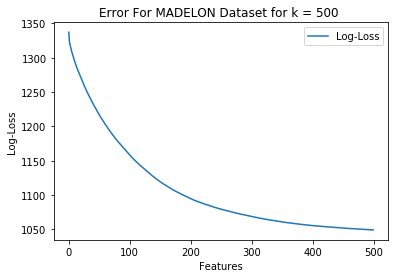

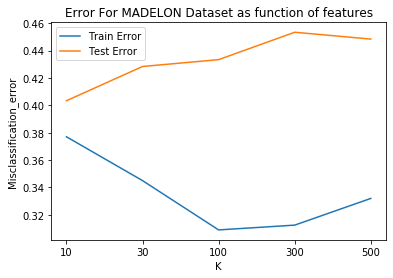

In [275]:
Training_error_3,Testing_error_3 = logitboost(Train_data_3,Train_label_3,Test_data_3,Test_label_3,"MADELON")

In [278]:
print(Training_error_3,Testing_error_3)

[0.377, 0.345, 0.30900000000000005, 0.3125, 0.33199999999999996] [0.4033333333333333, 0.42833333333333334, 0.43333333333333335, 0.45333333333333337, 0.44833333333333336]
